In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.stats.diagnostic import het_arch

In [6]:
datos_cartera=pd.read_csv('Datos/Transformados/cartera.csv', index_col=[0], parse_dates=[0])
datos_cartera.head()

,AAPL,CAT,MSFT
fecha,,,
2018-06-07,48.37500,156.289993,100.879997
2018-06-08,47.87750,155.320007,101.629997
2018-06-11,47.79000,156.350000,101.050003
2018-06-12,48.08000,157.485000,101.309998
2018-06-13,47.66625,154.700000,100.849998


In [7]:
# corr_pearson = datos_cartera.corr(method="pearson")

In [8]:
# fig, ax =plt.subplots(1,1, figsize=(10,10))

# sns.heatmap(corr_pearson, annot=True,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
# ax.set_yticklabels(ax.get_yticklabels(),rotation=0,horizontalalignment='right')
# ax.set_title("Spearman Correlation Matrix");

### AAPL

<Axes: xlabel='fecha'>

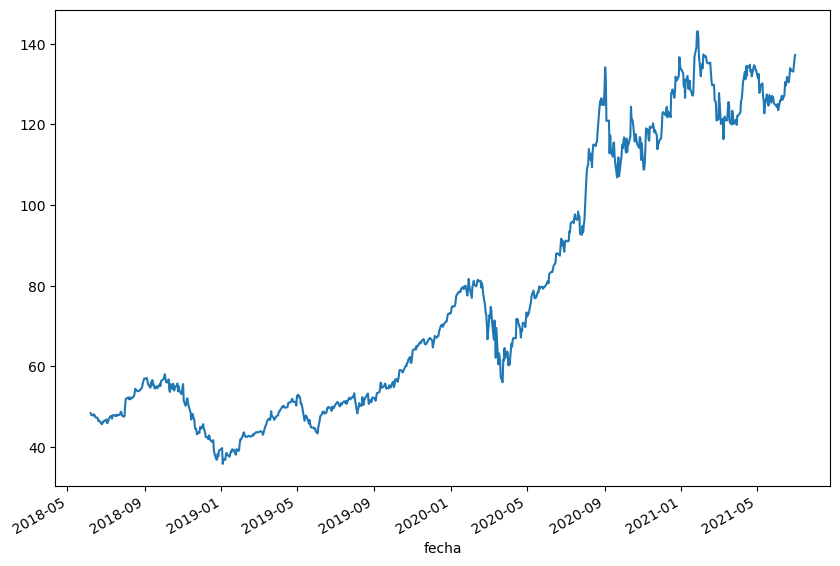

In [9]:
datos_cartera['AAPL'].plot(figsize=(10,7))

In [10]:
datos_cartera['AAPL'].isna().sum()

np.int64(0)

In [11]:
datos_cartera['AAPL'].dtype

dtype('float64')

In [12]:
datos_cartera['AAPL'].resample('Y').count()

C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\825100696.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['AAPL'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: AAPL, dtype: int64

ESTACIONALIDAD

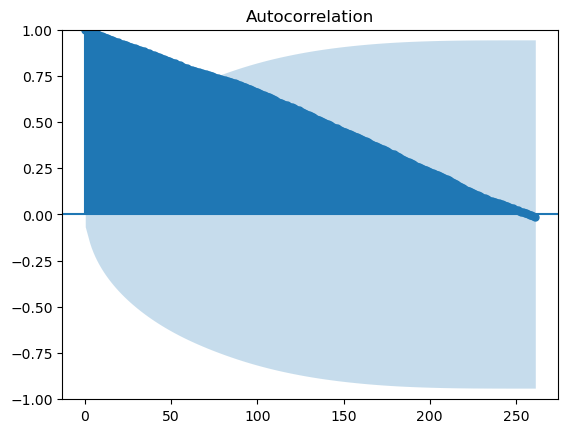

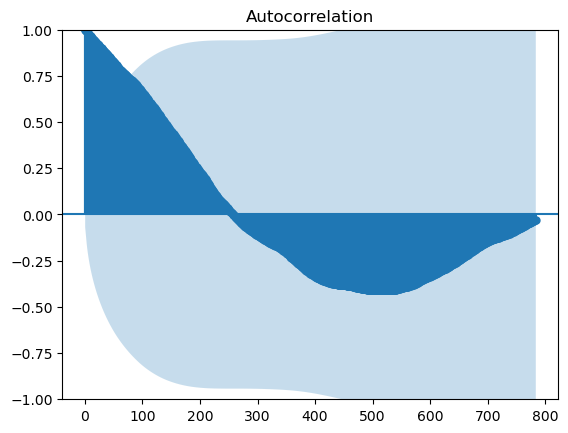

In [13]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['AAPL'], lags=261);
tsaplots.plot_acf(datos_cartera['AAPL'], lags=(261*3));

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

TENDENCIA

<Axes: xlabel='fecha'>

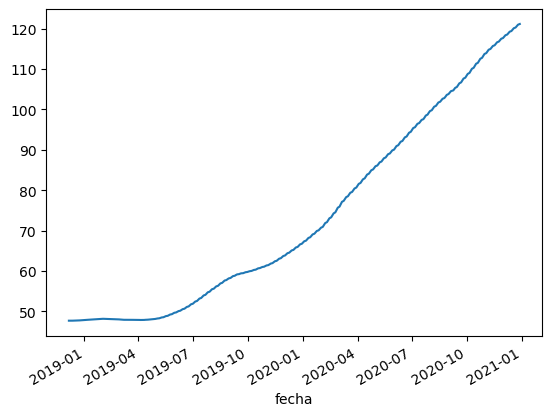

In [14]:
decomposicion_aapl=seasonal_decompose(datos_cartera['AAPL'], model='multiplicative', period=261)
trend=decomposicion_aapl.trend
trend.dropna(inplace=True)
trend.plot()

In [15]:
datos_cartera['resido_AAPLE'] = datos_cartera['AAPL'] - trend
datos_cartera['resido_AAPLE'].dropna(inplace=True)
datos_cartera.head()

,AAPL,CAT,MSFT,resido_AAPLE
fecha,,,,
2018-06-07,48.37500,156.289993,100.879997,NaN
2018-06-08,47.87750,155.320007,101.629997,NaN
2018-06-11,47.79000,156.350000,101.050003,NaN
2018-06-12,48.08000,157.485000,101.309998,NaN
2018-06-13,47.66625,154.700000,100.849998,NaN


<Axes: xlabel='fecha'>

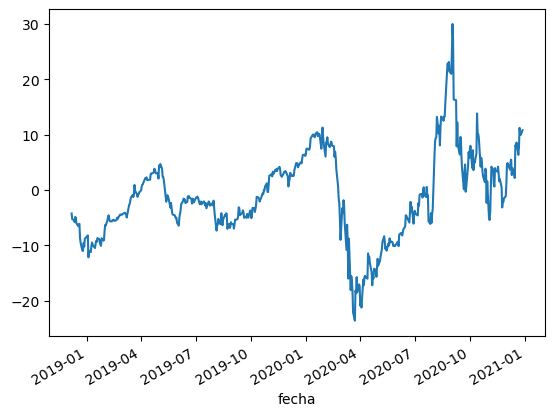

In [16]:
datos_cartera['resido_AAPLE'].plot()

In [17]:
def test_estacionario(residuo):

    residuo=residuo.dropna()
    adf_test = adfuller(residuo, autolag='AIC')
    p_adf = adf_test[1]

    kpss_test = kpss(residuo, nlags="auto")
    p_kpss = kpss_test[1]

    arch_test = het_arch(residuo)
    p_arch = arch_test[1]

    if p_adf < 0.05 and p_kpss > 0.05:
        estacionario = "La serie es ESTACIONARIA"
    else:
        estacionario = "La serie NO es estacionaria"

    if p_arch < 0.05:
        heterocedasticidad = "Existe HETEROCEDASTICIDAD (varianza no constante)"
    else:
        heterocedasticidad = "No hay heterocedasticidad (varianza constante)"

    resultados = {
        'ADF_pvalue': p_adf,
        'KPSS_pvalue': p_kpss,
        'ARCH_pvalue': p_arch,
        'Conclusión_estacionariedad': estacionario,
        'Conclusión_heterocedasticidad': heterocedasticidad
    }
    
    return resultados

In [18]:
test_aapl=test_estacionario(datos_cartera['resido_AAPLE'])
test_aapl

{'ADF_pvalue': np.float64(0.22849989581876767),
 'KPSS_pvalue': np.float64(0.06546031163641827),
 'ARCH_pvalue': np.float64(8.515958552554754e-90),
 'Conclusión_estacionariedad': 'La serie NO es estacionaria',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

<Axes: xlabel='fecha'>

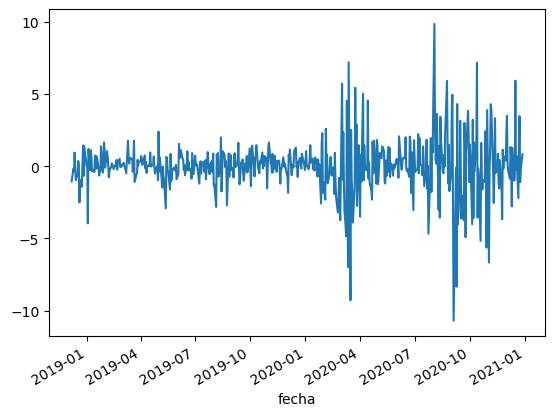

In [19]:
diff_apple=datos_cartera['resido_AAPLE'].diff()
datos_cartera['resido_AAPLE2']=diff_apple
datos_cartera['resido_AAPLE2'].plot()

In [20]:
test_estacionario(diff_apple)


C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': 0.0,
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(7.19460403606556e-15),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

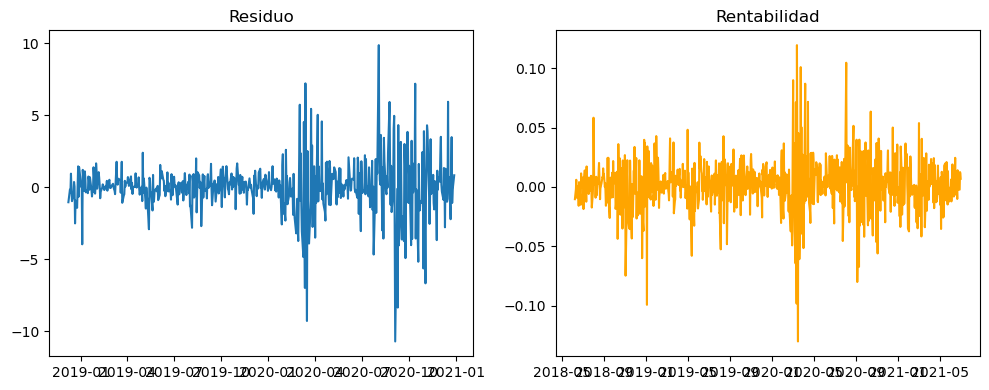

In [21]:
datos_cartera['rent_apple'] = datos_cartera['AAPL'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['resido_AAPLE2'])
axes[0].set_title("Residuo")

axes[1].plot(datos_cartera['rent_apple'], color='orange')
axes[1].set_title("Rentabilidad")

plt.tight_layout()  
plt.show()

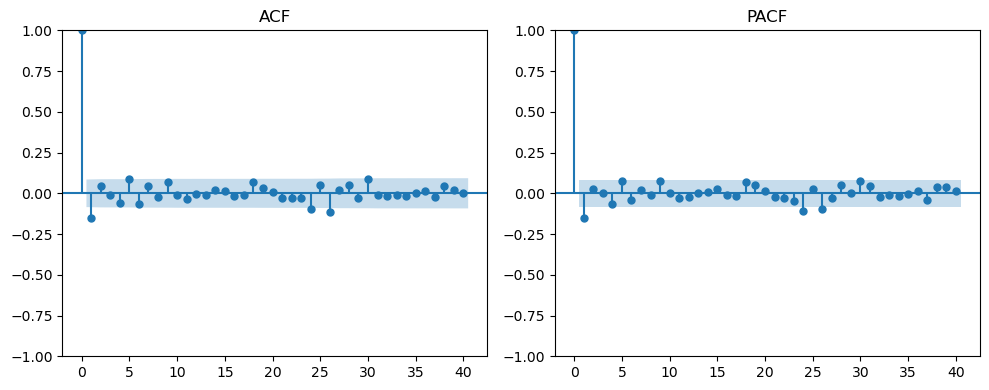

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['resido_AAPLE2'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF")

plot_pacf(datos_cartera['resido_AAPLE2'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF")

plt.tight_layout()
plt.show()


In [39]:
from arch import arch_model


In [66]:
garch11 = arch_model(datos_cartera['resido_AAPLE2'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['resido_AAPLE2'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 338264.67314810987
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1369.3538321570657
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1184.5292652739436
Iteration:      4,   Func. Count:     30,   Neg. LLF: 927.0262017402251
Iteration:      5,   Func. Count:     37,   Neg. LLF: 910.6142267130894
Iteration:      6,   Func. Count:     44,   Neg. LLF: 919.4315088847184
Iteration:      7,   Func. Count:     51,   Neg. LLF: 898.190655193402
Iteration:      8,   Func. Count:     57,   Neg. LLF: 898.1751813175222
Iteration:      9,   Func. Count:     63,   Neg. LLF: 898.2150465012646
Iteration:     10,   Func. Count:     70,   Neg. LLF: 898.1705001523429
Iteration:     11,   Func. Count:     76,   Neg. LLF: 898.1704916406169
Iteration:     12,   Func. Count:     81,   Neg. LLF: 898.1704910648766
Optimization terminated successfully    (Exit mode 0)
            Current function value: 898.1704916406169
            Iterations: 12

In [ ]:

import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)


      lb_stat  lb_pvalue
10  12.953426   0.226288
20  21.125576   0.389775
(np.float64(13.600896721236753), np.float64(0.19198638929034895), 1.3669933781336536, 0.19222860327932959)
alpha+beta = 0.917813360763672


Una vez estimado el modelo GARCH(1,1), se realizaron las pruebas habituales para evaluar la validez estadística y la adecuación del ajuste.

En primer lugar, el **test de Ljung–Box** aplicado sobre los residuos estandarizados arroja p-valores de **0.226 (lag 10)** y **0.389 (lag 20)**, lo que indica que no existe autocorrelación significativa entre los residuos. Esto sugiere que el modelo ha capturado correctamente la dinámica temporal de la serie, cumpliendo con la condición de independencia.

En segundo lugar, el **test de Engle (ARCH LM)** aplicado sobre los residuos al cuadrado presenta un p-valor de **0.192**, por lo que no se rechaza la hipótesis nula de homocedasticidad. Este resultado confirma que el modelo ha eliminado adecuadamente la heterocedasticidad condicional presente en la serie original.

Por último, la suma de los parámetros **α + β = 0.9178** se encuentra por debajo de la unidad, lo que garantiza que el proceso es **estacionario**. Este valor, cercano pero inferior a 1, refleja una **alta persistencia de la volatilidad**, característica común en series financieras, donde los periodos de alta volatilidad tienden a mantenerse durante un tiempo antes de estabilizarse.

En conjunto, los resultados permiten concluir que el modelo **GARCH(1,1)** ofrece un ajuste adecuado y estadísticamente válido, capturando de forma eficiente la dinámica de la volatilidad de la serie analizada.

### MSFT

<Axes: xlabel='fecha'>

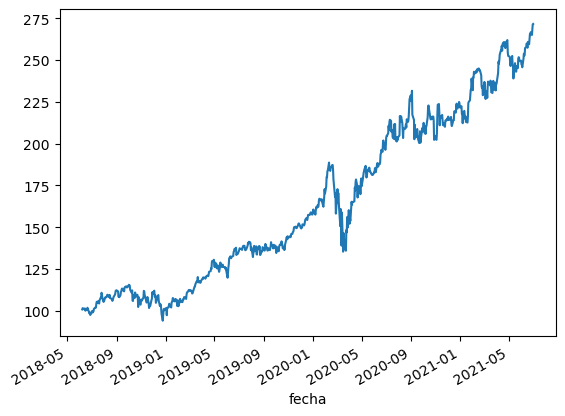

In [23]:
datos_cartera['MSFT'].plot()

In [24]:
datos_cartera['MSFT'].isna().sum()

np.int64(0)

In [25]:
datos_cartera['MSFT'].resample('Y').count()

C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\1920217640.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['MSFT'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: MSFT, dtype: int64

ESTACIONALIDAD

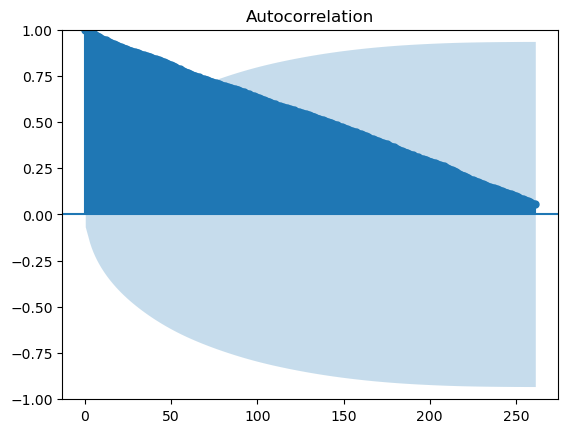

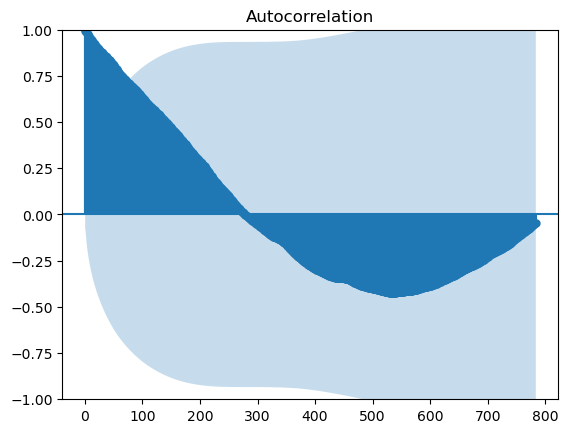

In [26]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['MSFT'], lags=261);
tsaplots.plot_acf(datos_cartera['MSFT'], lags=(261*3));

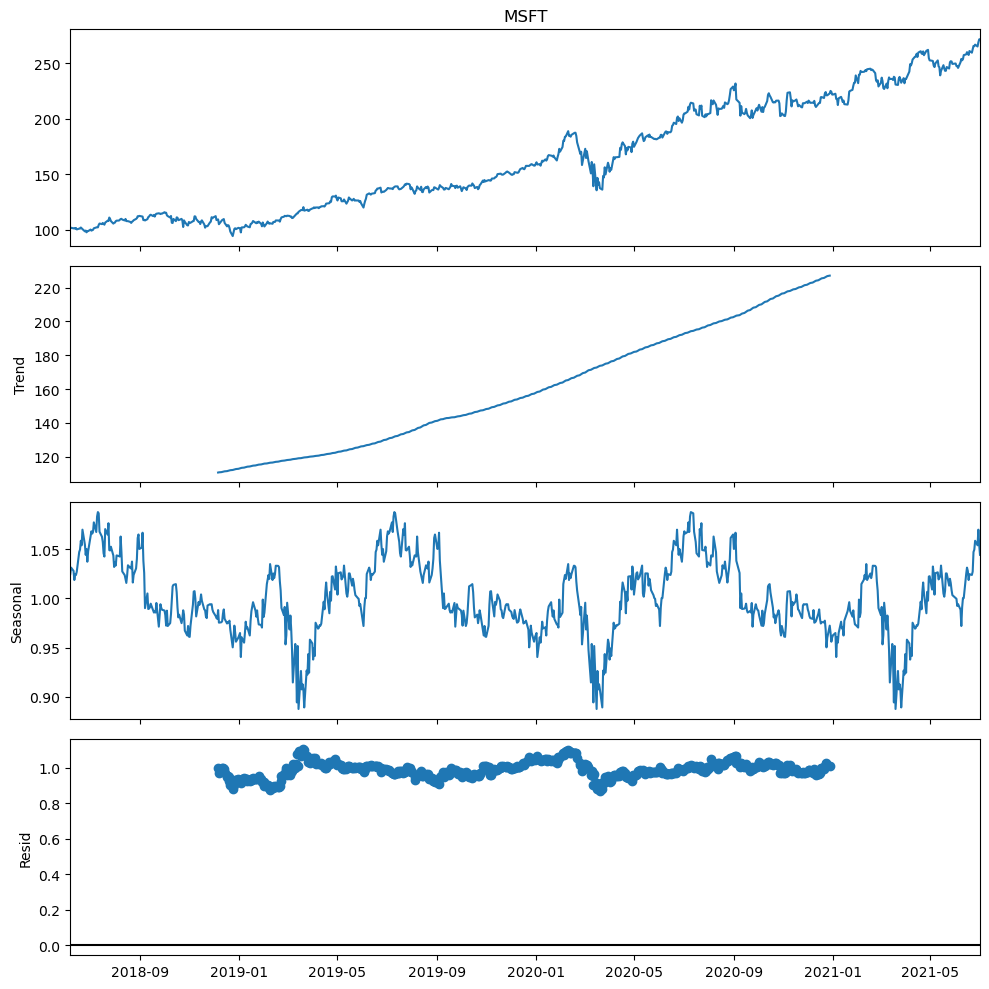

In [27]:
decomposicion_msft = seasonal_decompose(datos_cartera["MSFT"], model='multiplicativa', period=261)
plt.rcParams['figure.figsize'] = (10, 10)
decomposicion_msft.plot()
plt.show()

TENDENCIA

<Axes: xlabel='fecha'>

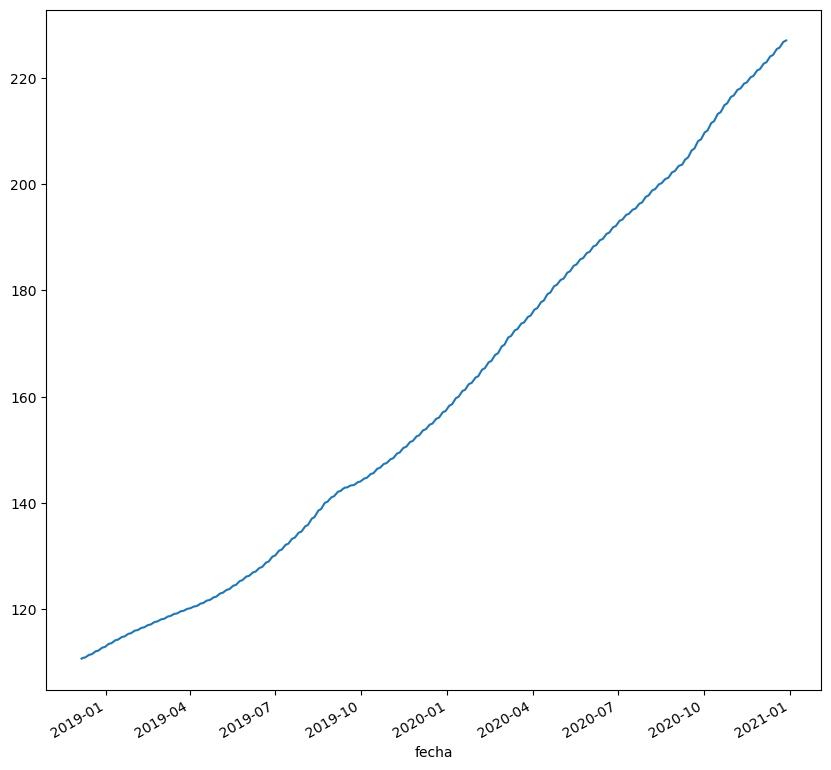

In [28]:
trend_msft=decomposicion_msft.trend
trend_msft.dropna(inplace=True)
trend_msft.plot()

ESTACIONALIDAD

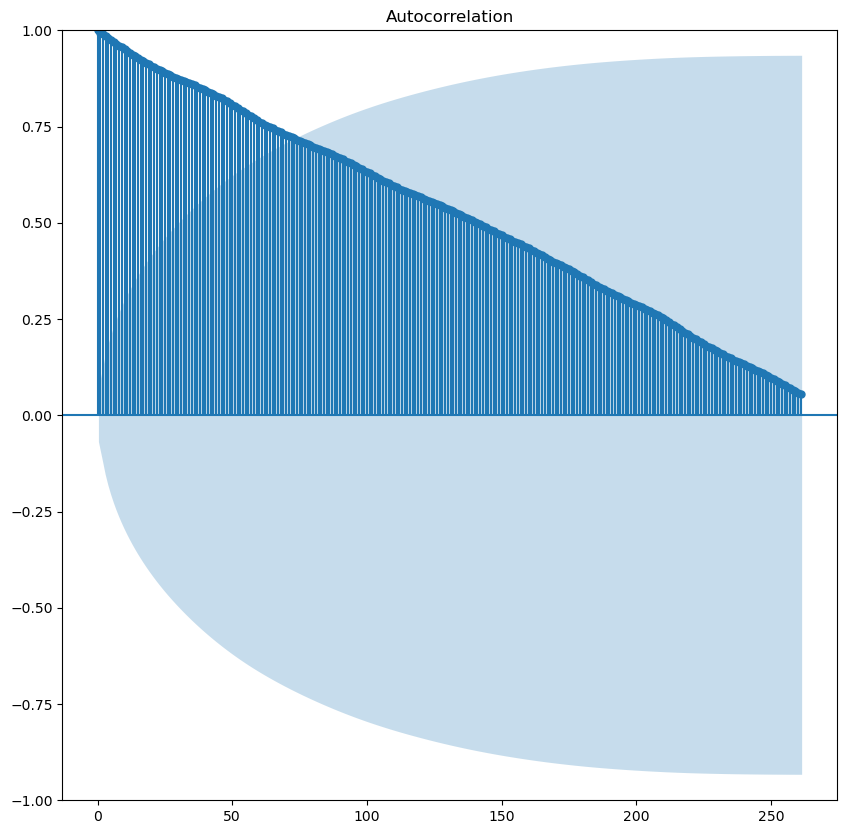

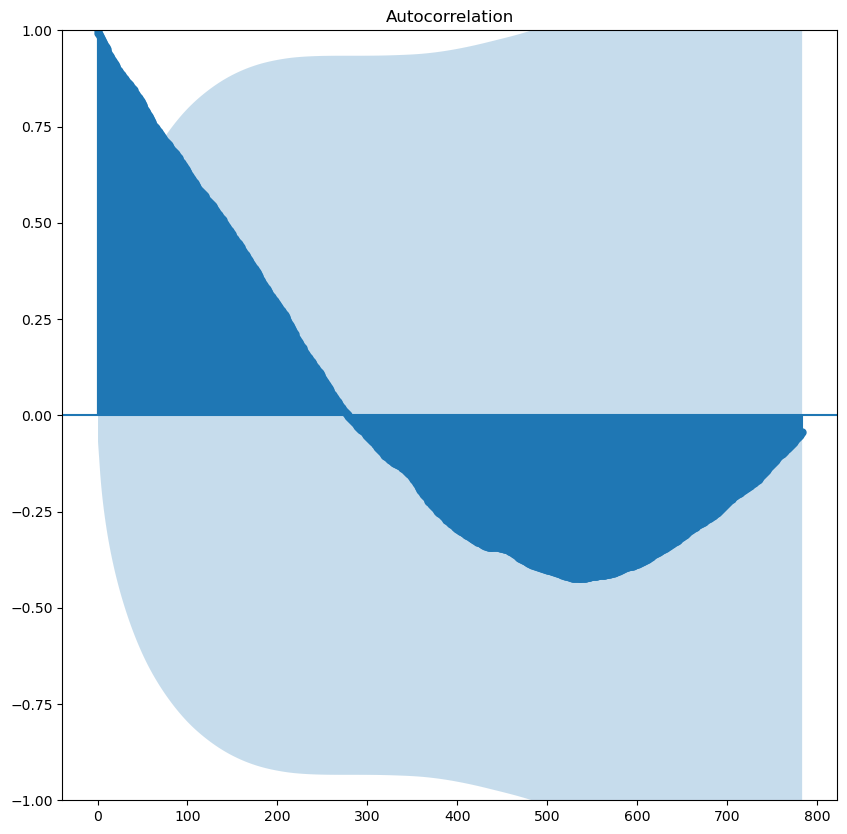

In [29]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['MSFT'], lags=261);
tsaplots.plot_acf(datos_cartera['MSFT'], lags=(261*3));

<Axes: xlabel='fecha'>

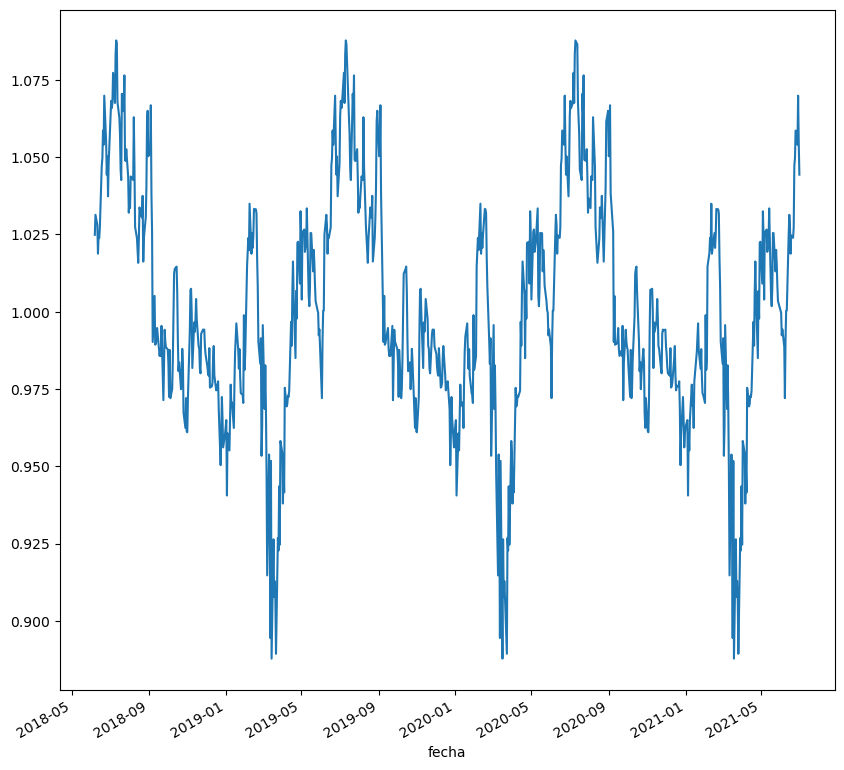

In [30]:
decomposicion_msft.seasonal.plot()

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

In [31]:
datos_cartera['residuo_MSFT'] = datos_cartera['MSFT'] - trend_msft
datos_cartera['residuo_MSFT'].dropna(inplace=True)
datos_cartera.head()

,AAPL,CAT,MSFT,resido_AAPLE,resido_AAPLE2,rent_apple,residuo_MSFT
fecha,,,,,,,
2018-06-07,48.37500,156.289993,100.879997,NaN,NaN,NaN,NaN
2018-06-08,47.87750,155.320007,101.629997,NaN,NaN,-0.010284,NaN
2018-06-11,47.79000,156.350000,101.050003,NaN,NaN,-0.001828,NaN
2018-06-12,48.08000,157.485000,101.309998,NaN,NaN,0.006068,NaN
2018-06-13,47.66625,154.700000,100.849998,NaN,NaN,-0.008605,NaN


<Axes: xlabel='fecha'>

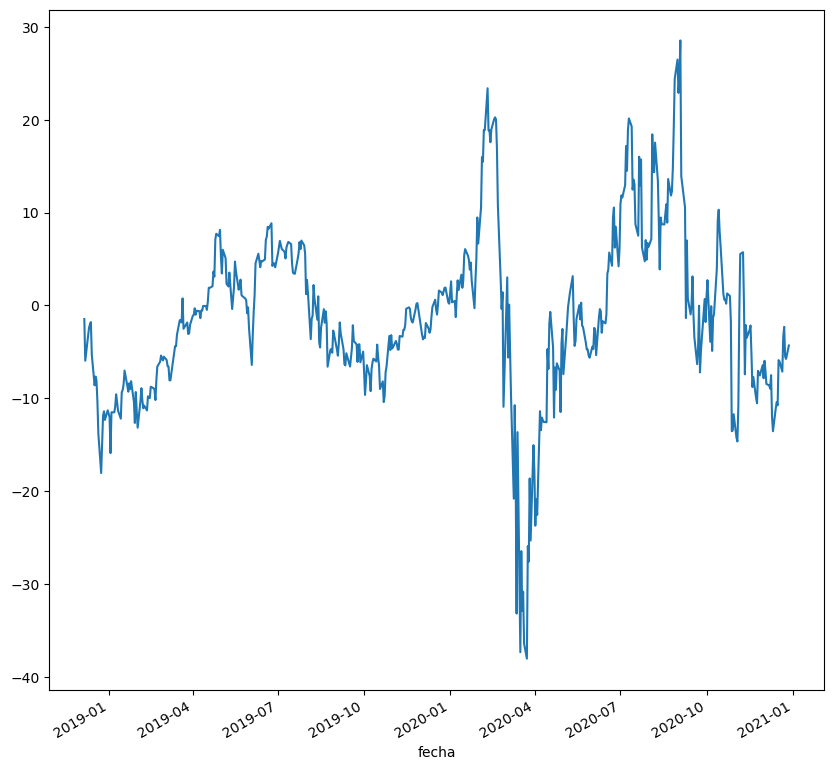

In [32]:
datos_cartera['residuo_MSFT'].plot()

In [33]:
test_msft=test_estacionario(datos_cartera['residuo_MSFT'])
test_msft

C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(0.0043497382968751275),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(6.428575653903413e-77),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

GARCH

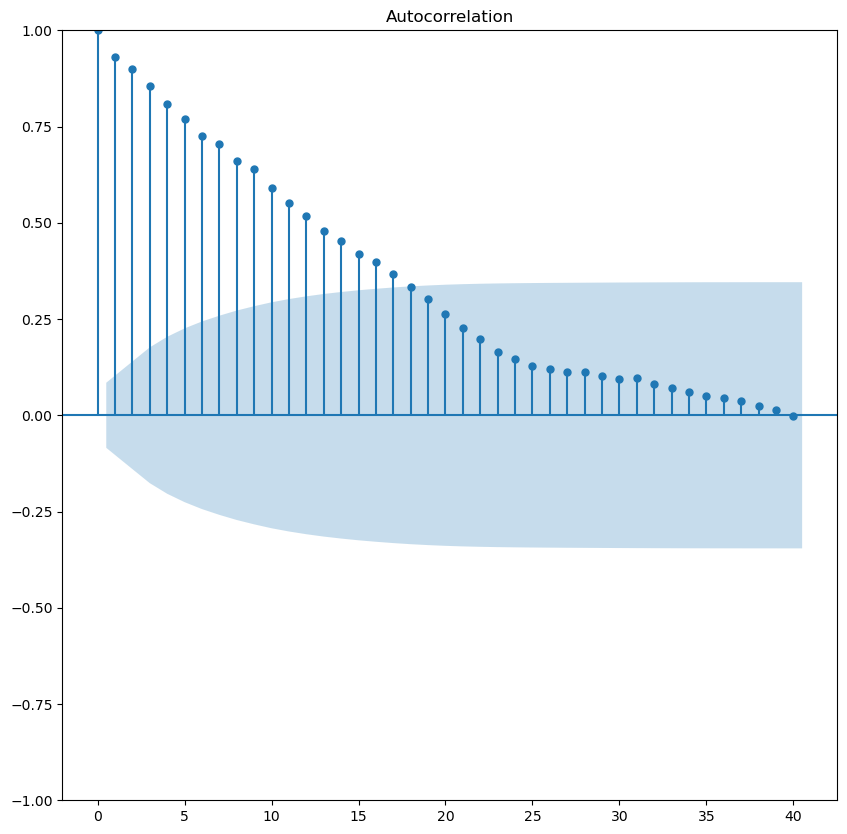

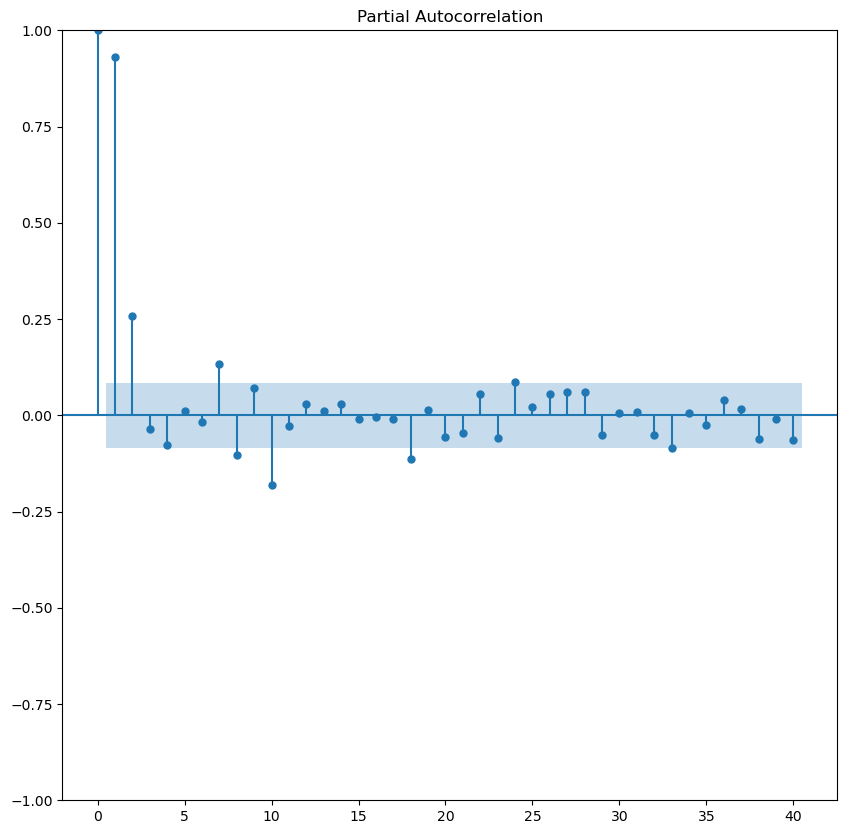

In [34]:
tsaplots.plot_acf(datos_cartera['residuo_MSFT'].dropna(), lags=40)
tsaplots.plot_pacf(datos_cartera['residuo_MSFT'].dropna(), lags=40)
plt.show()

In [ ]:
garch11 = arch_model(datos_cartera['residuo_MSFT'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_MSFT'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)

In [ ]:
# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)

# CAT

C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\2515794608.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['CAT'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: CAT, dtype: int64

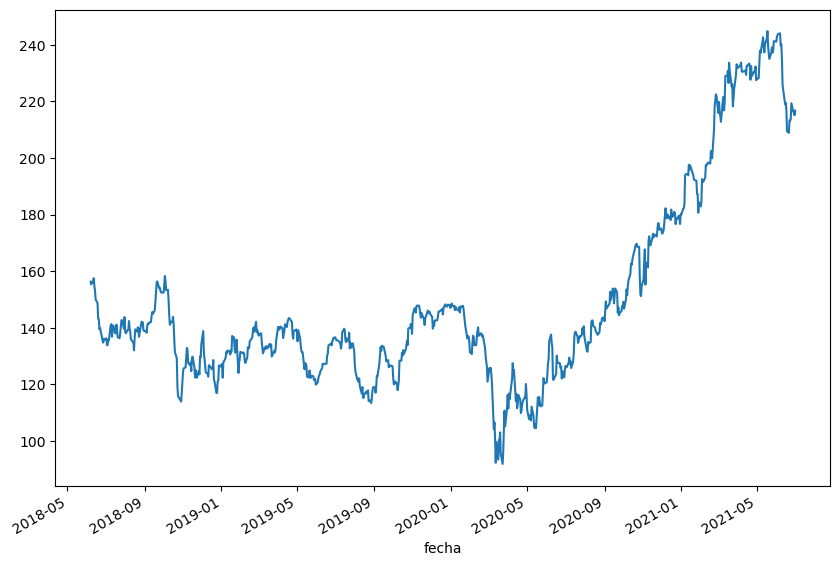

In [67]:
datos_cartera['CAT'].plot(figsize=(10,7))
datos_cartera['CAT'].isna().sum()
datos_cartera['CAT'].dtype
datos_cartera['CAT'].resample('Y').count()

### ESTACIONALIDAD

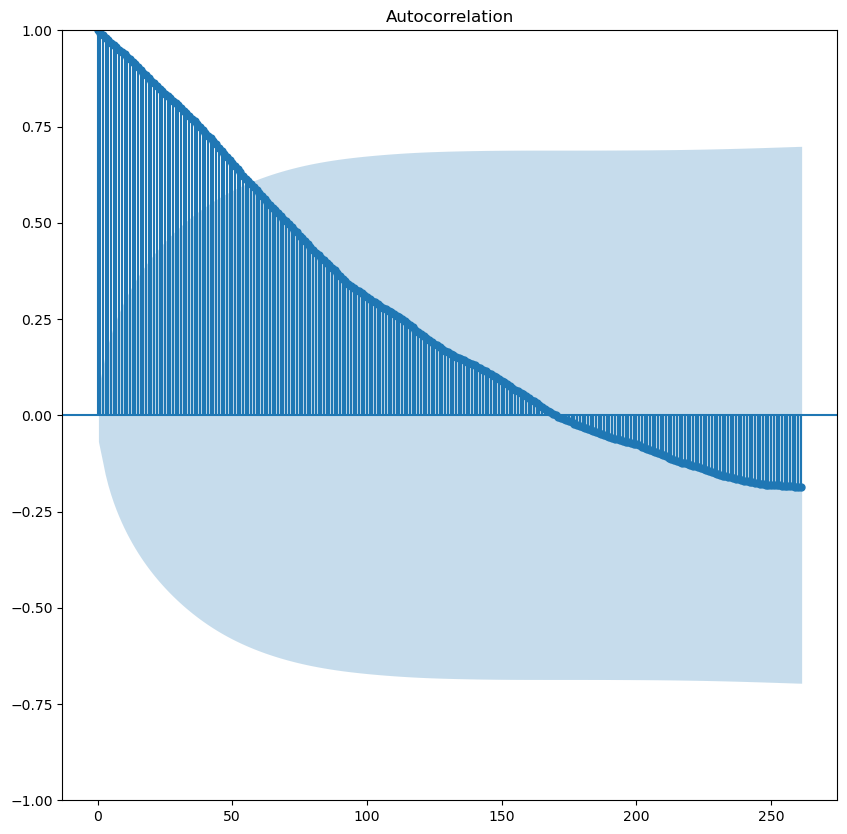

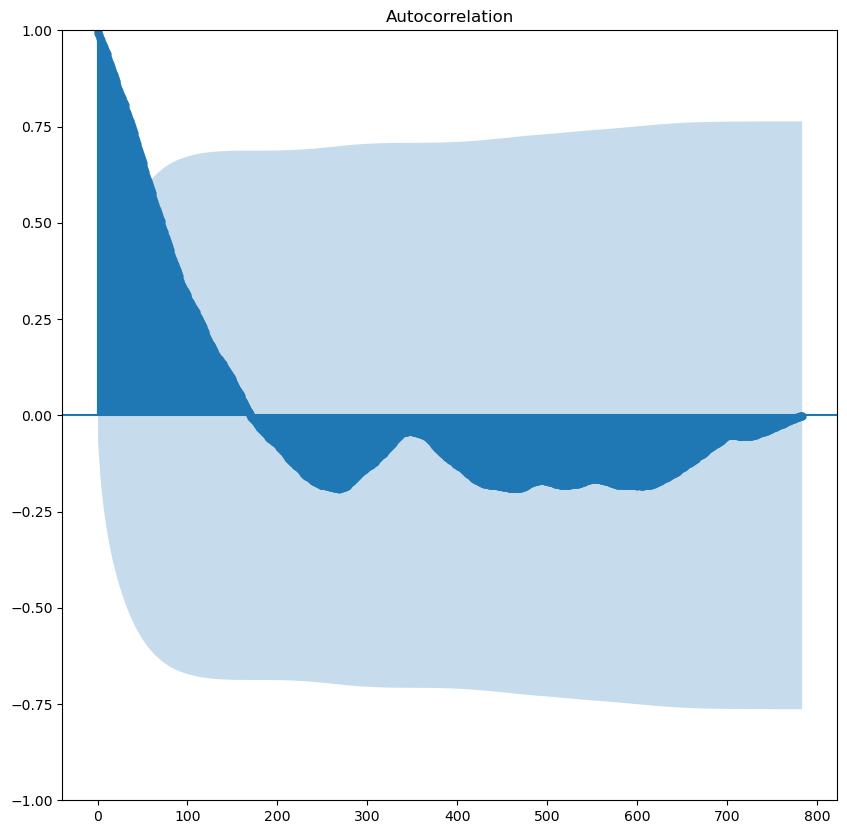

In [68]:
tsaplots.plot_acf(datos_cartera['CAT'], lags=261);
tsaplots.plot_acf(datos_cartera['CAT'], lags=(261*3));

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

### TENDENCIA

<Axes: xlabel='fecha'>

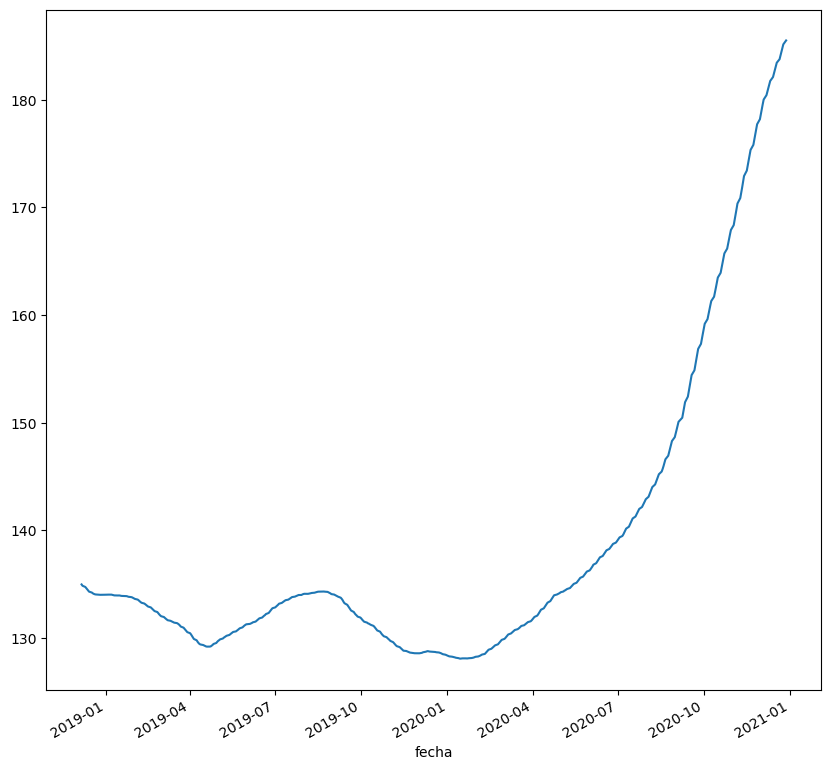

In [76]:
decomposicion_aapl=seasonal_decompose(datos_cartera['CAT'], model='multiplicative', period=261)
trend=decomposicion_aapl.trend
trend.dropna(inplace=True)
trend.plot()

In [78]:
datos_cartera['residuo_CAT']=datos_cartera['CAT'].diff()

In [77]:
#datos_cartera['resido_CAT'] = datos_cartera['CAT'] - trend
#datos_cartera['resido_CAT'].dropna(inplace=True)
#datos_cartera.head()
#datos_cartera['resido_CAT'].plot()

In [79]:
test_aapl=test_estacionario(datos_cartera['resido_CAT'])
test_aapl

{'ADF_pvalue': np.float64(0.038568031864419705),
 'KPSS_pvalue': np.float64(0.08730077739813757),
 'ARCH_pvalue': np.float64(6.748442489529984e-90),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

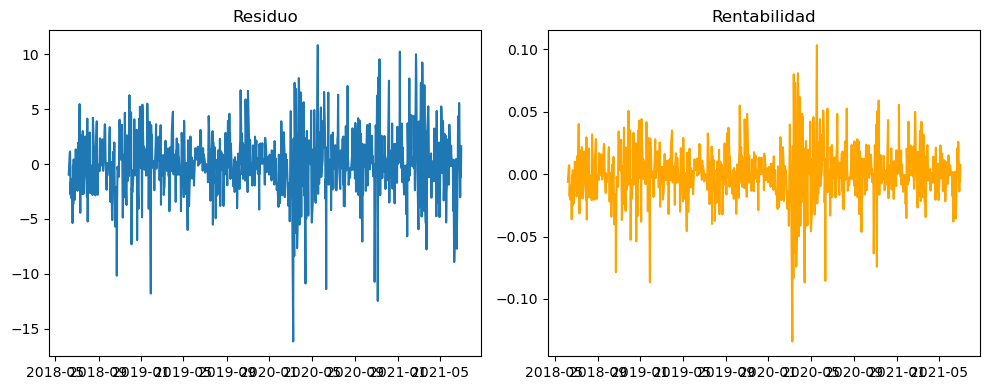

In [80]:
datos_cartera['rent_cat'] = datos_cartera['CAT'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_CAT'])
axes[0].set_title("Residuo")

axes[1].plot(datos_cartera['rent_cat'], color='orange')
axes[1].set_title("Rentabilidad")

plt.tight_layout()  
plt.show()

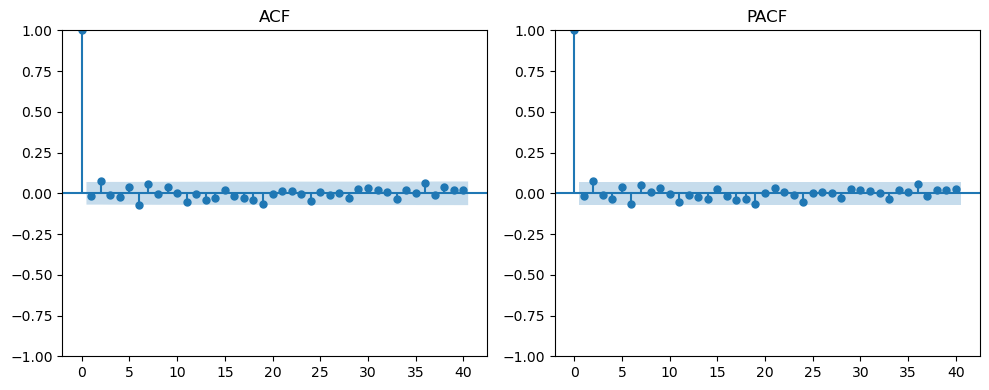

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['residuo_CAT'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF")

plot_pacf(datos_cartera['residuo_CAT'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF")

plt.tight_layout()
plt.show()

In [83]:
test_estacionario(gm_result.std_resid)
garch11 = arch_model(datos_cartera['residuo_CAT'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_CAT'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2290.8114895293475
Iteration:      2,   Func. Count:     17,   Neg. LLF: 922959974.4714248
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2184.643252223923
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1964.3152712930473
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1972.5817432178646
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1989.030933695372
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1956.7077288509463
Iteration:      8,   Func. Count:     64,   Neg. LLF: 1956.7077852604368
Iteration:      9,   Func. Count:     71,   Neg. LLF: 1956.7076747074698
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1956.7076747088915
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1956.7076747074698
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      9,   Neg. LLF: 2482.5903

C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


In [85]:
test_estacionario(res11.std_resid)

C:\Users\usuario\AppData\Local\Temp\ipykernel_22204\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(2.3562204173822485e-30),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(0.845585770544563),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'No hay heterocedasticidad (varianza constante)'}

In [86]:
# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)

      lb_stat  lb_pvalue
10  12.874404   0.230779
20  24.376413   0.226336
(np.float64(0.6884421160052854), np.float64(0.9999697344507418), 0.06794025053466628, 0.9999709258738094)
alpha+beta = 0.9701663279808008
